In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tomma.dubins_dynamics as dubins_dynamics
from tomma.dubins_dynamics import DubinsDynamics
from tomma.multi_agent_optimization import MultiAgentOptimization

In [2]:
dubins = DubinsDynamics(control=dubins_dynamics.CONTROL_LIN_ACC_ANG_VEL)
deg2rad = np.pi/180
x_bounds = np.array([
    [-10., 10.],
    [-10., 10.],
    [-1., 1.],
    [-np.inf, np.inf]
])
u_bounds = np.array([
    [-5, 5.],
    [-45*deg2rad, 45*deg2rad]
])

In [3]:
dubins = DubinsDynamics(control=dubins_dynamics.CONTROL_LIN_ACC_ANG_VEL)
x0 = np.array([[0.0, 0.0, 0.0, np.pi/4]])
xf = np.array([[1.0, 0.0, 0.5, -np.pi/4]])
tf = 5.0
planner = MultiAgentOptimization(dubins, num_agents=1, num_timesteps=10)

N = 100
import time
t_start = time.time()
planner.setup_mpc_opt(x0, xf, tf, x_bounds=x_bounds, u_bounds=u_bounds)
x, u, tf = planner.solve_opt()

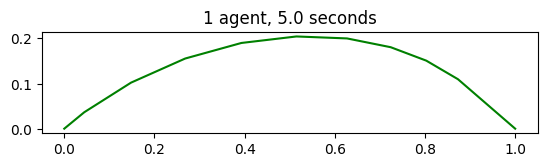

In [4]:
fig, ax = planner.draw_path()

In [18]:
dubins = DubinsDynamics(control=dubins_dynamics.CONTROL_LIN_ACC_ANG_VEL)
x0 = np.array([[0.0, 0.0, 0.0, np.pi/4]])
xf = np.array([[1.0, 0.0, 0.5, -np.pi/4]])
tf = 5.0
planner = MultiAgentOptimization(dubins, num_agents=1, num_timesteps=10)

# waypoints = {2: np.array([[0.2, 0.0, 0.0, 0.0]]), 3: np.array([[0.1, 0.0, 0.0, 0.0]]), 4:  np.array([[0.5, 0.0, 0.0, 0.0]])}
# Q_waypoints = {2: 1*np.eye(4), 3: 10*np.eye(4), 4: 2*np.eye(4)}
waypoints = {2: np.array([[0.2, 0.0, 0.0, 0.0]]), 4:  np.array([[0.5, 0.0, 0.0, 0.0]])}
Q_waypoints = {2: 1*np.eye(4), 4: 2*np.eye(4)}
Qf = 10*np.eye(4)

planner.setup_mpc_opt(x0, xf, tf, waypoints=waypoints, Q_waypoints=Q_waypoints, x_bounds=x_bounds, u_bounds=u_bounds)
N = 100
import time
t_start = time.time()
for i in range(N):
    x, u, tf = planner.solve_opt()
t_end = time.time()
print("Time per iteration: ", (t_end - t_start)/N)

Time per iteration:  0.025205669403076173


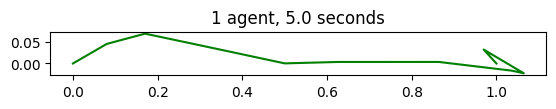

In [19]:
fig, ax = planner.draw_path()